# Phase2: supervised learning

**1. Logistic regression**



Logistic regression, also referred to as a logit model, is a statistical model commonly applied for predictive analytics and classification purposes. It predicts the likelihood of an event happening, such as voting or not voting, from a set of independent variables in a given dataset.[Source]

 
[Source]What is logistic regression? (no date) IBM. Available at: https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables. (Accessed: 10 May 2023).







First step we import libraries

In [147]:
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
iris =pd.read_csv('C:\AI-Project\Dataset\waterQualityCleaned.csv')

Then we split data into training and testing, it will be 70% (1407) for training and 30%(604) for testing

In [148]:
target= iris['Potability']
data= iris[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30,random_state=0)

In [149]:
print("Number of training data" , len(y_train))

print("Number of testing data" , len(y_test))

Number of training data 1407
Number of testing data 604


Numeber of Potable (1) and not Potable (0) in training data

In [150]:
y_train.value_counts()

Potability
0    833
1    574
Name: count, dtype: int64

After that we build logistic regrssion classifer and fit the training data useing fit(), then we perform prediction on test set using predict()

In [151]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Text(0.5, 23.52222222222222, 'predicted label')

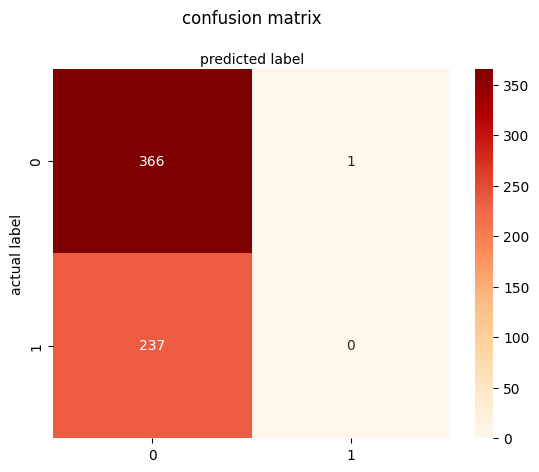

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

TP= confusion matrix[1,1] ,
TN= confusion matrix[0,0] ,
FP= confusion matrix[0,1] ,
FN= confusion matrix[1,0]


As we can see here in confusion matrix we have TP=0, TN=366, FP=1 and FN=237

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.61 for the negative and 0 for the positive .Also , the recall is 1 for negative and 0 for positive.Along with the f1-score that is 0.75 for negative and 0 for positive .Lastly the support is 367 for negative and 237 for positive.Also , it shows the averages

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       367
           1       0.00      0.00      0.00       237

    accuracy                           0.61       604
   macro avg       0.30      0.50      0.38       604
weighted avg       0.37      0.61      0.46       604



In [154]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100)    
#accuracyScore1, precisionScore1, recallscore1, specifity1
accuracyScore1= metrics.accuracy_score(y_test,y_pred)
precisionScore1=metrics.precision_score(y_test,y_pred)
recallscore1=metrics.recall_score(y_test,y_pred)   

Accuracy 60.59602649006622
precision 0.0
Recall 0.0


The accurcy of logistic regrssion classifer is equal to 60.59% , Precision and Recall 0

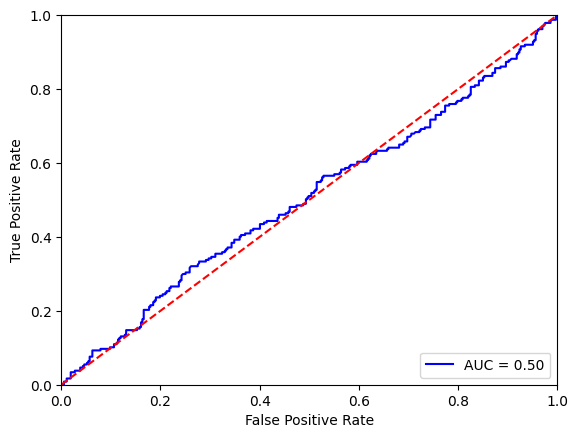

In [155]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

classifier_log = LogisticRegression().fit(X_train, y_train)
probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# polt AUC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The image obove is visualize ROC curve, which is represent the trade-off between sensitivity and specificity

**2.Decision Tree**

Decision tree methodology is a commonly used data mining method for establishing classification systems based on multiple covariates or for developing prediction algorithms for a target variable. This method classifies a population into branch-like segments that construct an inverted tree with a root node, internal nodes, and leaf nodes[source].

[source]Song, Y.-Y. and Lu, Y. (2015) Decision tree methods: Applications for classification and prediction, Shanghai archives of psychiatry. U.S. National Library of Medicine. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/ (Accessed: May 4, 2023). 

In the first step, we will import the necessary libraries.

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

Then we will train the model using our dataset where we have splitted the dataset into two parts training and testing,
it will be 70% (1407) for training and 30%(604) for testing

In [157]:
target= iris['Potability']
data= iris[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30,random_state=0)


print("Number of training data" , len(y_train))
print("Number of testing data" , len(y_test))

Number of training data 1407
Number of testing data 604


After that by using the tress library from sklearn library we implmented the decision tree classifer to train it.

In [158]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)

Text(0.5, 23.52222222222222, 'predicted label')

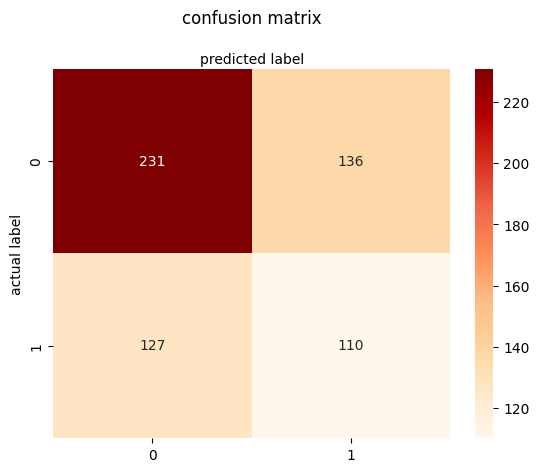

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

Here , we obtain the confusion matrix we obtain the results which are TN=231 , TP=110 , FN=127 , FP = 136  

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.65 for the negative and 0.45 for the positive .Also , the recall is 0.63 for negative and 0.46 for positive.Along with the f1-score that is 0.64 for negative and 0.46 for positive .Lastly the support is 367 for negative and 237 for positive.Also , it shows the averages

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       367
           1       0.45      0.46      0.46       237

    accuracy                           0.56       604
   macro avg       0.55      0.55      0.55       604
weighted avg       0.57      0.56      0.57       604



In [161]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100) 

accuracyScore2= metrics.accuracy_score(y_test,y_pred)
precisionScore2=metrics.precision_score(y_test,y_pred)
recallscore2=metrics.recall_score(y_test,y_pred) 

Accuracy 56.456953642384114
precision 44.71544715447154
Recall 46.41350210970464


Here we calculated the Accuracy of the model which is 56.45 and the Precision which is 44.71 and the Recall is 46.41.


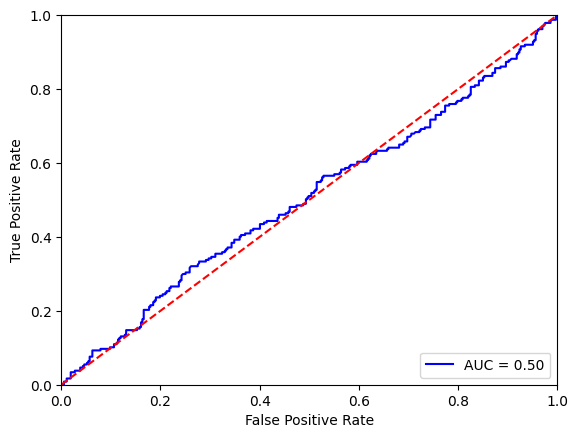

In [162]:
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

classifier_log = LogisticRegression().fit(X_train, y_train)
probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# polt AUC
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The image obove is visualize ROC curve, which is represent the trade-off between sensitivity and specificity as the AUC is 0.50 and that indicates that the model did not classify the data set correctly.

*Descsion tree visulization*

Finally, the last step is to vizualize our tree and compare the reults. Firstly, we will visualize our decision tree using the plot_tree method from the 'matplotib' library. The visualization will be a plot tree that showcases the branching of our decision tree along with some information for each node.(note: we obtained that the tree appeard to be complecated and hard to read although we trained the model with the preprocessed dataset .It also shows how the DT reached to the results)

In [163]:
from sklearn import tree
from matplotlib import pyplot as plt

#We will use this method to visualize our tree.
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(model_tree, 
                   feature_names=X.columns,  
                   class_names={0:'Potable', 1:'Not Potable'},
                   filled=True,
                  fontsize=8)


NameError: name 'X' is not defined

<Figure size 1200x800 with 0 Axes>

**3.SVM Classifier**

*Support Vector Machines* (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes.SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.[source]

*Hyperplane*
A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin.

*Support Vectors*
Support vectors are the sample data points, which are closest to the hyperplane.


*Margin*
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points.


[source]prashant111 (2020) SVM classifier tutorial, Kaggle. Available at: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial (Accessed: 04 May 2023). 



*Import libraries*

We will import the needed libraries for classifing along with the Kfold libraries to preform cross folding.

In [164]:
# Improving SVM

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings

warnings.filterwarnings('ignore')

Exploring the dataset before training the SVM model.

In [165]:
#What are the value counts after the data preprocessing 
iris['Potability'].value_counts()
#Getting the information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       2011 non-null   int64
 1   ph               2011 non-null   int64
 2   Hardness         2011 non-null   int64
 3   Solids           2011 non-null   int64
 4   Chloramines      2011 non-null   int64
 5   Sulfate          2011 non-null   int64
 6   Conductivity     2011 non-null   int64
 7   Organic_carbon   2011 non-null   int64
 8   Trihalomethanes  2011 non-null   int64
 9   Turbidity        2011 non-null   int64
 10  Potability       2011 non-null   int64
dtypes: int64(11)
memory usage: 172.9 KB


*Training the model*

Here we will start training the model first by dropping the class label which in our case is Potability attribute.

In [166]:
# Dropping the class label
X = iris.drop(['Potability'], axis=1)

y = iris['Potability']

Here we splitted the dataset into two parts : Traing and Testing .

In [167]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)

Here we defined a variable kfold to preform the cross folding and choose the k to be 10.

In [168]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# number of splits = 10


After that we imported the SVM library and the specific type SVC library and accuracy score library. Moreover, we train the model using our dataset afte we did the preprocessing as it shown below.

In [ ]:
# import SVC classifier
from sklearn import svm
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

model_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

y_pred=model_svm.predict(X_test)
results = cross_val_score(model_svm, X_train, y_train, cv=kfold, scoring='accuracy')


In [1]:
import seaborn as sns
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred)*100)
print("precision",metrics.precision_score(y_test,y_pred)*100)
print("Recall",metrics.recall_score(y_test,y_pred)*100)  

accuracyScore3= metrics.accuracy_score(y_test,y_pred)
precisionScore3=metrics.precision_score(y_test,y_pred)
recallscore3=metrics.recall_score(y_test,y_pred)

NameError: name 'y_test' is not defined

Here we calculated the Accuracy equals to 59.55 and Precision equals to 0 and Recall equals to 0.

Here we preformed the 10 fold cross-validation and printed the results we hoped it will improve the resultes but as it shows the best accuracy can gets is 0.627 and 62.7% it has improved yet it is still low.

In [ ]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(model_svm, X_train,y_train, cv=kfold,scoring='accuracy')
print("\n10-fold cross-validation:")
print(results_svm)

Here We implement the confusion matrix and obtaind the results which are 240 true negative and 163 are false neagtive and the true positive and false positive are both 0.

In [ ]:
# visualize confusion matrix with seaborn heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

CNF_Matrix=metrics.confusion_matrix(y_test,y_pred)

class_name=[0,1]
fig, ax = plt.subplots()
tick_mark=np.arange(len(class_name))
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)

sns.heatmap(pd.DataFrame(CNF_Matrix),annot=True,cmap="OrRd",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

Here , we obtain the confusion matrix we obtain the results which are TN=240 , TP=0 , FN=163 , FP = 0  

*Classification Report*

We will then use the classification_report() method to generate a report for both the Potable and Not Potable values. This report shows us the precision and recall score again for the Potability values, and it also shows the scores in terms of the Not Potable values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy, and the support. (Note: We generated this report just for more information about our model; we will not use these values when visualizing or comparing).

Here we obtain the report regarding the model where it has the precision that equals to 0.60 for the negative and 0 for the positive .Also , the recall is 1 for negative and 0 for positive.Along with the f1-score that is 0.75 for negative and 0 for positive .Lastly the support is 240 for negative and 163 for positive.Also , it shows the averages

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In the ROC Curve below the line is stright and parallel to the curve therefore it shows that the model is not predecting and not knowing the dataset right .And this result occurs from the values that are in  the dataset where they are unclear!

# comparison
--------------------------------------------------------------------------------------------------------------------------------

As we can see in the three supervised learning methods, namely:
1. Logistic Regression 
2. Decision Tree 
3. SVM Classifier


The accuracy values are close and tend to be low in all three methods. After the research, it was discovered that the problem is related to our data set.

As mentioned above, we see that the accuracy value in 

Logistic Regression is 60.59, 

Decision Tree is 56.45, 

and the SVM is 59.55.

--------------------------------------------------------------

 From the list of accuracy we obtained, we conclude that Logistic Regression is the best in accuracy because it has the largest value.


As for the Recall of 

Logistic Regression it is 0.0,

 Decision Tree is 46.41,

  and SVM is 0.0

--------------------------------------------------------------

Thus, we conclude that the Decision Tree  has  better recall as it has the highest value


As for the Precision of 

Logistic Regression it is 0.0, 

Decision Tree is 44.71, 

and SVM is 0.0

Therefore, we figure that the Decision Tree has better Precision as it holds the highest value


**Visualization**

*Model comparision* 

--------------------------------------------------------------

In visualization below we can obtain that the three models gives a close results regarding the Acccuracy and Precision and Recall Score .From that we obtain that the dataset was unclaer to the models to train from and enven we have used a cross folding methods and we did the preprossing for our data set it is still gives a bad results.But , Among the models for our data set the Decision Tree model gave us the best results among the three models. 

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

compare = ("Accuracy", "Precision", "Recall Score")
models = {
    'Decision Tree': (accuracyScore2, precisionScore2, recallscore2),
    'Logistic Regression': (accuracyScore1, precisionScore1, recallscore1),
    'SVM ':(accuracyScore3, precisionScore3, recallscore3)
}

x = np.arange(len(compare))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Models comparision')
ax.set_xticks(x + width, compare)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 2)

plt.show()